In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidental-analysis')
jovian.set_colab_id('1QfVIWX3xg8btKn1wC0N8DNz2ZyU7VQWa')

     |████████████████████████████████| 68 kB 2.6 MB/s 


# us-accidental-analysis

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidental-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/temitopeyakub28/us-accidental-analysis


'https://jovian.ai/temitopeyakub28/us-accidental-analysis'

In [6]:
pip install opendatasets --quiet

In [7]:
import opendatasets as od


In [8]:
dataset_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"

In [9]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: temitopeyakub
Your Kaggle Key: ··········


  0%|          | 0.00/290M [00:00<?, ?B/s]

100%|██████████| 290M/290M [00:11<00:00, 27.3MB/s]


In [10]:
us_data = "./content/us-accidents/US_Accidents_Dec20_Updated.csv"

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization


In [12]:
missing_values = ["n.a.","n/a", "na", "--", "0"]
df = pd.read_csv("/content/us-accidents/US_Accidents_Dec20_Updated.csv",na_values = missing_values)
df.head(5)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,NaN,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,NaN,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,NaN,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,NaN,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
df.tail() #TO DISPLAY THE BOOTOM FIVE ROWS 


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,NaN,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,NaN,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,NaN,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906609,A-2906610,2,2018-03-26 13:35:03,2018-03-26 14:39:00,38.831749,-104.748161,38.831749,-104.748161,NaN,Accident on Murray Blvd at Byron Dr.,NaN,Byron Dr,R,Colorado Springs,El Paso,CO,80916,US,US/Mountain,KCOS,2018-03-26 13:54:00,51.1,NaN,38.0,29.77,10.0,SE,13.8,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [14]:
df.columns  #TO CHECK THE HEADERS IF IT IS WELL WRITTEN



Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
df.info()  #TO GET THE SUMMARY OP THE DATATFRAME, THE DATA TYPES IN THIS DATAFRAME ARE INTEGER, FLOAT, AND OBJECT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [16]:
df.shape  #TO GET THE DIMENSIONS OF THE DATAFRAME

(2906610, 47)

In [17]:
df.count() #To get the number of non-missing values for each column 

ID                       2906610
Severity                 2906610
Start_Time               2906610
End_Time                 2906610
Start_Lat                2906610
Start_Lng                2906610
End_Lat                  2623789
End_Lng                  2623789
Distance(mi)             1339358
Description              2906610
Number                   1014937
Street                   2906610
Side                     2906610
City                     2906502
County                   2906610
State                    2906610
Zipcode                  2905496
Country                  2906610
Timezone                 2903180
Airport_Code             2900002
Weather_Timestamp        2859693
Temperature(F)           2838548
Wind_Chill(F)            1722077
Humidity(%)              2835340
Pressure(in)             2849701
Visibility(mi)           2832467
Wind_Direction           2843136
Wind_Speed(mph)          2303036
Precipitation(in)         198664
Weather_Condition        2834759
Amenity   

In [18]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,1.339358e+06,1.014937e+06,2.838548e+06,1.722077e+06,2.835340e+06,2.849701e+06,2.832467e+06,2.303036e+06,198664.000000
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,8.638377e-01,6.789734e+03,6.100673e+01,5.501200e+01,6.537758e+01,2.965686e+01,9.123412e+00,8.824337e+00,0.090457
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,2.258684e+00,1.697225e+04,1.842552e+01,2.217308e+01,2.287854e+01,9.092438e-01,2.827603e+00,4.941135e+00,0.429730
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,1.000000e-03,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,2.000000e-02,6.000000e-02,1.000000e+00,0.010000
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,7.200000e-02,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,5.800000e+00,0.010000
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,3.380000e-01,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,8.000000e+00,0.030000
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,8.170000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.150000e+01,0.080000
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,24.000000


In [19]:
df.isnull().values.any() #To know if there is any misiing data in our dataframe

True

In [20]:
df.replace('', np.nan, inplace=True) #TO REPLACE EMPTY CELL TO NAN

In [21]:
 df.isnull().sum() #THE SUM OF  MISSING VALUE DATA
 

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)             1567252
Description                    0
Number                   1891673
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             68062
Wind_Chill(F)            1184533
Humidity(%)                71270
Pressure(in)               56909
Visibility(mi)             74143
Wind_Direction             63474
Wind_Speed(mph)           603574
Precipitation(in)        2707946
Weather_Condition          71851
Amenity   

In [22]:
missing_percentages = pd.DataFrame(df.isna().mean().round(4).sort_values(ascending=False)*100 )  # THE PERCENTAGE OF MISSING VALUE  DATA
missing_percentages


,0
Precipitation(in),93.17
Number,65.08
Distance(mi),53.92
Wind_Chill(F),40.75
Wind_Speed(mph),20.77
End_Lat,9.73
End_Lng,9.73
Visibility(mi),2.55
Weather_Condition,2.47
Humidity(%),2.45


### **Percentage of Missing Data**

In [23]:
missing_percentage_only = missing_percentages.loc[(missing_percentages != 0).any(axis=1)]
missing_percentage_only

,0
Precipitation(in),93.17
Number,65.08
Distance(mi),53.92
Wind_Chill(F),40.75
Wind_Speed(mph),20.77
End_Lat,9.73
End_Lng,9.73
Visibility(mi),2.55
Weather_Condition,2.47
Humidity(%),2.45


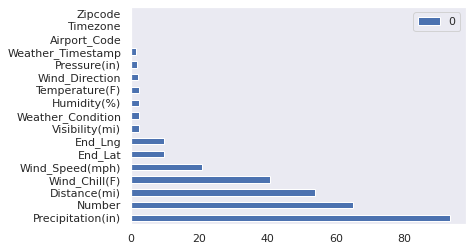

In [113]:
missing_percentage_only.plot(kind="barh") #A basic plot of missing data 

FILLING AND DROPPING

FILLING
## **Filling rows that the column is less than 50%

In [27]:

# using fillna() to fill i missing data by mean
df[["End_Lat", "End_Lng","Zipcode","Timezone","Airport_Code",'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)','Weather_Condition']].fillna(df[["End_Lat", "End_Lng","Zipcode","Timezone","Airport_Code",'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)','Weather_Condition']].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,NaN,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,NaN,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### 

## Here, I will be dropping column that is more than 50%

In [29]:
df.dropna(inplace=True)  #To drop rows that contain missing values
df.reset_index(drop=True, inplace=True) #To reset the index after dropping some rows
df.drop(['Precipitation(in)','Number','Distance(mi)'], axis=1, inplace=True)



To check if the datframe still has empty data

In [30]:
df.isnull().values.any() #No missing data again

False

In [31]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

### States with the highest number of accidents

In [32]:
States = df.State.unique()
States

array(['OR', 'CT', 'PA', 'LA', 'SC', 'MN', 'CA', 'MA', 'FL', 'TX', 'NY',
       'MO', 'IL', 'AZ', 'NC', 'MD', 'AL', 'WA', 'CO', 'VA', 'TN', 'UT',
       'NV', 'GA', 'MS', 'NJ', 'MI', 'DC', 'OH', 'AR', 'KY', 'MT', 'IN',
       'VT', 'WV', 'IA', 'ME', 'ID', 'WI', 'NH', 'RI', 'DE', 'NM', 'ND',
       'NE', 'SD', 'KS', 'OK', 'WY'], dtype=object)

### **To get the number of States in the dataset**

In [33]:
len(States)

49

In [34]:
States_by_Accident = df.State.value_counts()[:10]
States_by_Accident

OR    2333
FL    2239
PA    1063
CA     753
NY     653
SC     584
NC     546
TX     537
VA     455
IL     370
Name: State, dtype: int64

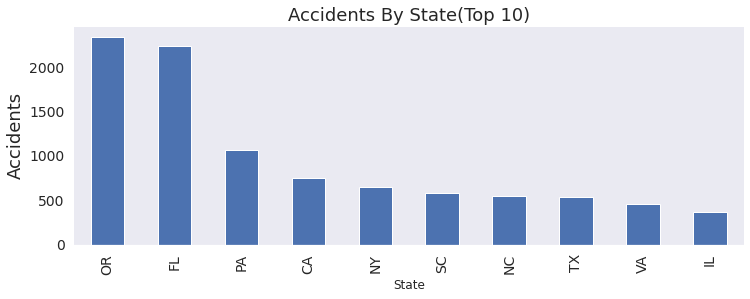

In [35]:
#Visualization
import seaborn as sns
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(12,4))
States_by_Accident.plot(kind="bar")
# sns.barplot(data=data, x="severity", y="freq", palette="Green")
plt.xlabel('State')
plt.ylabel('Accidents', size=18)
plt.title('Accidents By State(Top 10)', size=18)

plt.xticks(size=14)
plt.yticks(size=14)
sns.despine(left=True);



The plot potrays that Oregon(OR) has the highest  number of accidents followed by Florida(FL) and Pennsylvania(PA).


**Cities** with the highest number of accidents

In [36]:
Cities = df.City.unique() #
Cities

array(['Portland', 'Meriden', 'Mc Alisterville', ..., 'Warm Springs',
       'Burlington', 'Castile'], dtype=object)

In [37]:
len(Cities) #Number of Cities

2145

The number of cities in the dataset is 2145.

In [115]:
Cities_by_Accident = df.City.value_counts()[:10]
Cities_by_Accident

Miami          921
Orlando        292
Houston        246
Raleigh        209
Dallas         162
Rochester      156
Charlotte      154
Portland       132
Baton Rouge    119
Chattanooga    112
Name: City, dtype: int64

Text(0.5, 1.02, 'Accidents By Cities(Top 10)')

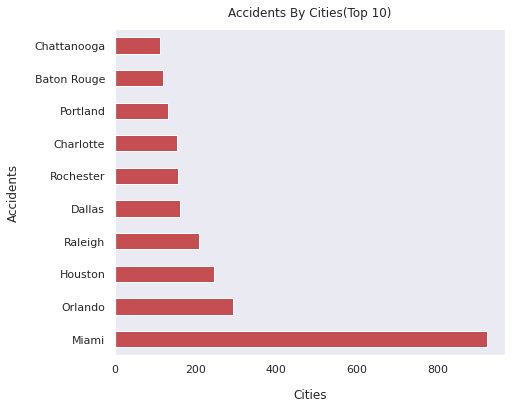

In [117]:

Cities_by_Accident.plot(kind="barh", figsize = (7,6), rot = 0, color= "r")
# sns.barplot(data=data, x="severity", y="freq", palette="Green")
plt.xlabel('Cities', labelpad= 14)
plt.ylabel('Accidents', labelpad= 14)
plt.title('Accidents By Cities(Top 10)', y= 1.02)

We can see that the most accident-prone city in the USA are  Miami and Orlando which they are  in Florida(The second State with highest  number of accidents) followed by Houston.

Accident by **Region**

In [41]:
Accident_by_Timezone = df.value_counts(["Timezone"]).reset_index(name="Accident")
Accident_by_Timezone

,Timezone,Accident
0,US/Eastern,6870
1,US/Pacific,3418
2,US/Central,1953
3,US/Mountain,421


In [42]:
len(df["Timezone"].unique())
# len(Timezone)



4

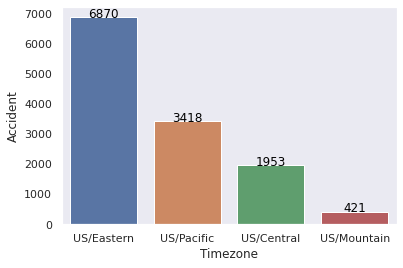

In [43]:
r =sns.barplot(x="Timezone", y="Accident", data=Accident_by_Timezone)

for index, row in Accident_by_Timezone.iterrows():
  r.text(row.name, row.Accident, round(row.Accident,2), color= "black", ha="center")

We can seee that most numbers of accidents that took place in regions with timezone are
Eastern Standard Time followed by Pacific Standard Time.

**Wind Direction by Accident**

In [44]:
Accident_by_Wind_direction =df.value_counts(["Wind_Direction"]).reset_index(name= "Accident")[:10]
Accident_by_Wind_direction

,Wind_Direction,Accident
0,S,1046
1,E,994
2,SSE,974
3,ENE,824
4,NE,812
5,ESE,809
6,SE,793
7,NNE,763
8,N,739
9,SSW,643


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

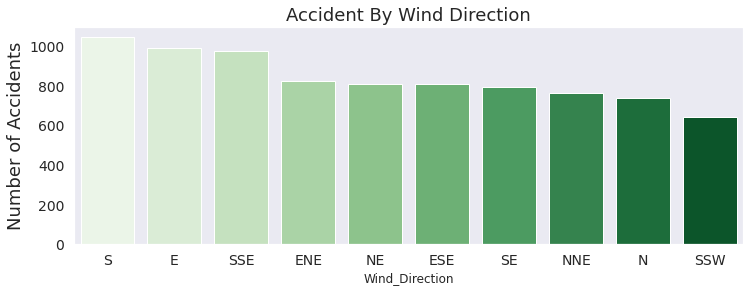

In [45]:
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=Accident_by_Wind_direction, x="Wind_Direction", y="Accident", palette="Greens")
plt.xlabel('Wind_Direction')
plt.ylabel('Number of Accidents', size=18)
plt.title('Accident By Wind Direction', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
# sns.despine(left=True);

The Wind direction to the South, East and South-South_East has the highest numbers of accidents>

In [46]:
Accident_by_Weather_Condition =df.value_counts(["Weather_Condition"]).reset_index(name= "Accident")[:10]
Accident_by_Weather_Condition

,Weather_Condition,Accident
0,Light Rain,5469
1,Rain,1539
2,Cloudy,1480
3,Light Snow,946
4,Heavy Rain,544
5,Mostly Cloudy,478
6,Overcast,323
7,Snow,229
8,Light Rain / Windy,166
9,Partly Cloudy,156


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

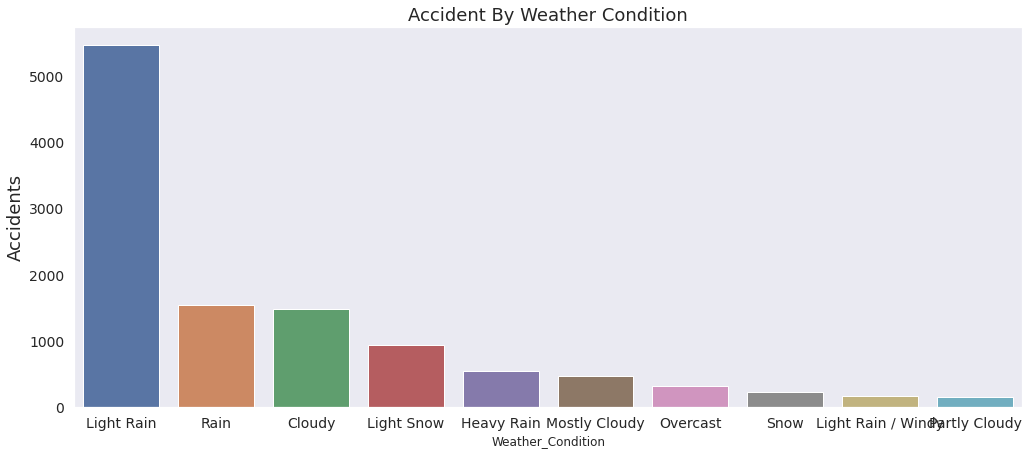

In [47]:
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(data=Accident_by_Weather_Condition, x="Weather_Condition", y="Accident")
plt.xlabel('Weather_Condition')
plt.ylabel('Accidents', size=18)
plt.title('Accident By Weather Condition', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
# sns.despine(left=True);

The plot shows  that the weather condition for most of the accidents was Light Rain, folowed by Rain, and Cloudy. Light Rain, Rain and Cloudy may be a reasonable factors for accidents. which means that weather conditions also does not play a major role.

In [48]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-394,2,2019-04-08 07:55:21,2019-04-08 11:55:21,45.562813,-122.590408,45.562904,-122.590929,At OR-213/NE 82nd Ave - Accident.,NE Killingsworth St,R,Portland,Multnomah,OR,97218-3324,US,US/Pacific,KPDX,2019-04-08 07:53:00,49.0,45.0,97.0,29.97,10.0,ESE,9.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-499,2,2020-10-29 18:18:20,2020-10-29 20:34:12,41.565275,-72.774369,41.562706,-72.775415,Incident on N BROAD ST near HOUSE 1722 Expect ...,N Broad St,L,Meriden,New Haven,CT,06450-2465,US,US/Eastern,KMMK,2020-10-29 18:08:00,46.0,41.0,89.0,29.55,8.0,N,9.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
2,A-537,2,2020-12-25 01:43:00,2020-12-25 03:57:37,40.644755,-77.293184,40.653826,-77.296075,Incident on TENNIS PARK RD near YODER LN Drive...,Tennis Park Rd,L,Mc Alisterville,Juniata,PA,17049,US,US/Eastern,KSEG,2020-12-25 01:51:00,54.0,54.0,94.0,28.89,5.0,WSW,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-643,2,2020-12-19 09:26:00,2020-12-19 11:07:26,32.515087,-93.748596,32.514381,-93.749573,Incident on TRAVIS ST near MARKET ST Drive wit...,Market St,L,Shreveport,Caddo,LA,71101-3221,US,US/Central,KDTN,2020-12-19 09:39:00,49.0,45.0,86.0,29.96,2.0,NNW,10.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-778,2,2020-11-11 21:08:15,2020-11-11 22:48:54,34.865355,-82.433279,34.865183,-82.433517,Incident on SC-253 near PARKER RD Drive with c...,W Blue Ridge Dr,L,Greenville,Greenville,SC,29611-3441,US,US/Eastern,KGMU,2020-11-11 20:53:00,71.0,71.0,93.0,28.82,9.0,S,5.0,Light Rain,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night


In [ ]:
df.columns


In [ ]:
df.info()

### **More Cleansing**
I need to drop Country and Turning Loop beacuse the two columns has only one entry  which are "USA" and "False". This shows that the dataset contains only USA and there is no turning point beacuse the column is  False.

In [51]:
df.drop(["Country","Turning_Loop"], axis=1,inplace=True) #To drop the two columns


## **Correlation of the dataframe**

In [52]:
df.corr() # A brief paerson"s correlation of the dataframe

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,1.000000,0.188835,0.102669,0.188869,0.102683,-0.165136,-0.166235,0.008362,0.016201,-0.065369,-0.029884,-0.010612,0.000105,-0.024441,0.021015,0.034393,-0.005335,-0.006174,-0.003750,-0.028748,-0.003934,0.000105,-0.003281
Start_Lat,0.188835,1.000000,-0.479826,0.999998,-0.479806,-0.699860,-0.675216,-0.020719,-0.213287,-0.123099,-0.034455,-0.013358,-0.011902,-0.060812,0.006975,0.028651,-0.017312,0.016048,-0.016335,-0.159428,0.033764,-0.011902,-0.088376
Start_Lng,0.102669,-0.479826,1.000000,-0.479729,0.999999,0.304299,0.278790,0.070118,0.111003,-0.044070,0.066477,0.001275,0.011118,0.044313,0.013398,0.024745,-0.003857,-0.020118,0.006341,0.072273,-0.034505,0.011118,0.125900
End_Lat,0.188869,0.999998,-0.479729,1.000000,-0.479709,-0.699838,-0.675194,-0.020742,-0.213312,-0.123097,-0.034422,-0.013347,-0.011901,-0.060776,0.006943,0.028657,-0.017310,0.016048,-0.016340,-0.159439,0.033776,-0.011901,-0.088351
End_Lng,0.102683,-0.479806,0.999999,-0.479709,1.000000,0.304299,0.278793,0.070116,0.110998,-0.044069,0.066459,0.001272,0.011117,0.044299,0.013400,0.024749,-0.003858,-0.020127,0.006341,0.072268,-0.034497,0.011117,0.125888
Temperature(F),-0.165136,-0.699860,0.304299,-0.699838,0.304299,1.000000,0.992979,-0.026762,0.206462,0.293960,0.008435,0.011678,0.005535,0.064235,-0.005146,-0.018120,0.007568,-0.002342,0.010971,0.143712,-0.017310,0.005535,0.045754
Wind_Chill(F),-0.166235,-0.675216,0.278790,-0.675194,0.278793,0.992979,1.000000,-0.015400,0.204576,0.297378,-0.052688,0.013983,0.005904,0.063709,-0.002885,-0.019590,0.008706,-0.000223,0.010501,0.135175,-0.013278,0.005904,0.043029
Humidity(%),0.008362,-0.020719,0.070118,-0.020742,0.070116,-0.026762,-0.015400,1.000000,0.070904,-0.262531,-0.113293,0.002058,-0.003448,-0.019461,0.002864,-0.010150,0.012946,-0.004778,0.011468,-0.008675,-0.010420,-0.003448,-0.026735
Pressure(in),0.016201,-0.213287,0.111003,-0.213312,0.110998,0.206462,0.204576,0.070904,1.000000,0.052214,-0.043948,0.019452,0.011285,0.037733,-0.011296,0.008509,0.010972,0.014691,0.004633,0.076218,-0.021857,0.011285,0.030145
Visibility(mi),-0.065369,-0.123099,-0.044070,-0.123097,-0.044069,0.293960,0.297378,-0.262531,0.052214,1.000000,-0.044214,-0.004616,0.011697,0.040575,-0.011646,-0.022336,0.013403,0.002018,0.010315,0.047008,-0.011762,0.011697,0.013787


After checking the correlation, End_Lat and Start_Lat, and Wind Chill(F) and Temperature(F) are highly positively correlated.
Also, End_lng and Start_lng are  highly  positive correllated for continous data. Now, I'II be dropping End_Lat and End_lng, Wind Chill(F) columns respectively. 

In [120]:
 df.drop(["End_Lat","End_Lng","Wind_Chill(F)"], axis=1,inplace=True) #To drop the two columns
df.drop(["Wind_Chill(F)"], axis=1,inplace=True) #To drop Wind_CHill column

In [54]:
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-394,2,2019-04-08 07:55:21,2019-04-08 11:55:21,45.562813,-122.590408,At OR-213/NE 82nd Ave - Accident.,NE Killingsworth St,R,Portland,Multnomah,OR,97218-3324,US/Pacific,KPDX,2019-04-08 07:53:00,49.0,45.0,97.0,29.97,10.0,ESE,9.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-499,2,2020-10-29 18:18:20,2020-10-29 20:34:12,41.565275,-72.774369,Incident on N BROAD ST near HOUSE 1722 Expect ...,N Broad St,L,Meriden,New Haven,CT,06450-2465,US/Eastern,KMMK,2020-10-29 18:08:00,46.0,41.0,89.0,29.55,8.0,N,9.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
2,A-537,2,2020-12-25 01:43:00,2020-12-25 03:57:37,40.644755,-77.293184,Incident on TENNIS PARK RD near YODER LN Drive...,Tennis Park Rd,L,Mc Alisterville,Juniata,PA,17049,US/Eastern,KSEG,2020-12-25 01:51:00,54.0,54.0,94.0,28.89,5.0,WSW,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### **Categorical Data**
# Categorical data is a collection of information that is divided into groups.Categorical data can also take on numerical values (such as “1” indicating Yes and “2” indicating No), but those numbers don’t have mathematical meaning. One can neither add them together nor subtract them from each other. An example of numerical value that  is a category data is "severity" in the our dataset, which ranges from 1-4.

In [55]:
categorical_data= df.select_dtypes(exclude=[np.number]) #These are columns that can be grouped
categorical_data


,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-394,2019-04-08 07:55:21,2019-04-08 11:55:21,At OR-213/NE 82nd Ave - Accident.,NE Killingsworth St,R,Portland,Multnomah,OR,97218-3324,US/Pacific,KPDX,2019-04-08 07:53:00,ESE,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-499,2020-10-29 18:18:20,2020-10-29 20:34:12,Incident on N BROAD ST near HOUSE 1722 Expect ...,N Broad St,L,Meriden,New Haven,CT,06450-2465,US/Eastern,KMMK,2020-10-29 18:08:00,N,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
2,A-537,2020-12-25 01:43:00,2020-12-25 03:57:37,Incident on TENNIS PARK RD near YODER LN Drive...,Tennis Park Rd,L,Mc Alisterville,Juniata,PA,17049,US/Eastern,KSEG,2020-12-25 01:51:00,WSW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-643,2020-12-19 09:26:00,2020-12-19 11:07:26,Incident on TRAVIS ST near MARKET ST Drive wit...,Market St,L,Shreveport,Caddo,LA,71101-3221,US/Central,KDTN,2020-12-19 09:39:00,NNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-778,2020-11-11 21:08:15,2020-11-11 22:48:54,Incident on SC-253 near PARKER RD Drive with c...,W Blue Ridge Dr,L,Greenville,Greenville,SC,29611-3441,US/Eastern,KGMU,2020-11-11 20:53:00,S,Light Rain,False,False,True,False,False,False,False,False,False,False,False,True,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,A-2905837,2018-12-22 02:48:16,2018-12-22 03:17:48,Closed at 9th St - Road closed due to accident.,E Main St,L,West Newton,Westmoreland,PA,15089-1507,US/Eastern,KAGC,2018-12-22 02:53:00,WNW,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
12658,A-2905882,2020-11-07 06:56:00,2020-11-07 09:19:11,Incident on COUNTRY CLUB DR near HARMONY GROVE...,Country Club Dr,L,Escondido,San Diego,CA,92029-2711,US/Pacific,KCRQ,2020-11-07 06:53:00,ESE,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
12659,A-2905943,2020-09-26 06:26:43,2020-09-26 12:35:44,Incident on W COMMERCE RD WB near BAINBRIDGE S...,W Commerce Rd,R,Richmond,Richmond City,VA,23224-2315,US/Eastern,KFCI,2020-09-26 06:56:00,NNE,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
12660,A-2905958,2020-11-29 05:12:04,2020-11-29 07:54:04,Incident on BRAZOS ST near DREW ST Drive with ...,Tuam St,R,Houston,Harris,TX,77006-3408,US/Central,KMCJ,2020-11-29 04:53:00,N,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Night,Night


Also, there is another column that need to be added to the categorical data, Here, i need to get the column from the dataframe(df) and join it together with Categorical data to get the full categorical data in the dataset.

In [56]:
df[["Severity"]]

,Severity
0,2
1,2
2,2
3,2
4,2
...,...
12657,4
12658,2
12659,2
12660,2


## **Dataframe for all Categorical Data**

In [57]:
 full_categorical_dataframe = pd.concat([categorical_data, df[["Severity"]]], axis=1, join="inner") #Combining the tow datframe together
full_categorical_dataframe.head(3)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-394,2019-04-08 07:55:21,2019-04-08 11:55:21,At OR-213/NE 82nd Ave - Accident.,NE Killingsworth St,R,Portland,Multnomah,OR,97218-3324,US/Pacific,KPDX,2019-04-08 07:53:00,ESE,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2
1,A-499,2020-10-29 18:18:20,2020-10-29 20:34:12,Incident on N BROAD ST near HOUSE 1722 Expect ...,N Broad St,L,Meriden,New Haven,CT,06450-2465,US/Eastern,KMMK,2020-10-29 18:08:00,N,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2
2,A-537,2020-12-25 01:43:00,2020-12-25 03:57:37,Incident on TENNIS PARK RD near YODER LN Drive...,Tennis Park Rd,L,Mc Alisterville,Juniata,PA,17049,US/Eastern,KSEG,2020-12-25 01:51:00,WSW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2


### **Drop all features that need to be dropped in the above categorical features.**

To drop any faetures, i need to check for the correlation, if two features  is  highly correlated absolutely(>|-0.80, 0.80|), I"II drop one.

In [58]:
full_categorical_dataframe.corr()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Severity
Amenity,1.000000,-0.003412,0.101866,-0.007302,-0.002929,-0.004468,0.001527,-0.001289,0.097353,0.011230,-0.003412,0.079659,-0.010612
Bump,-0.003412,1.000000,-0.007316,-0.001184,0.032075,-0.000724,-0.002414,-0.000209,-0.004916,0.018859,1.000000,-0.009271,0.000105
Crossing,0.101866,-0.007316,1.000000,0.050899,-0.010726,0.017569,0.269659,-0.002764,0.093505,0.051037,-0.007316,0.368723,-0.024441
Give_Way,-0.007302,-0.001184,0.050899,1.000000,-0.004965,-0.001550,-0.005166,-0.000447,-0.010521,0.065898,-0.001184,0.044702,0.021015
Junction,-0.002929,0.032075,-0.010726,-0.004965,1.000000,-0.003038,0.005796,0.090102,-0.020616,0.006517,0.032075,-0.022295,0.034393
No_Exit,-0.004468,-0.000724,0.017569,-0.001550,-0.003038,1.000000,-0.003161,-0.000274,-0.006437,0.012442,-0.000724,-0.004619,-0.005335
Railway,0.001527,-0.002414,0.269659,-0.005166,0.005796,-0.003161,1.000000,-0.000912,0.087263,0.020671,-0.002414,0.043863,-0.006174
Roundabout,-0.001289,-0.000209,-0.002764,-0.000447,0.090102,-0.000274,-0.000912,1.000000,-0.001858,-0.001361,-0.000209,-0.003503,-0.003750
Station,0.097353,-0.004916,0.093505,-0.010521,-0.020616,-0.006437,0.087263,-0.001858,1.000000,-0.018819,-0.004916,0.095609,-0.028748
Stop,0.011230,0.018859,0.051037,0.065898,0.006517,0.012442,0.020671,-0.001361,-0.018819,1.000000,0.018859,-0.046427,-0.003934


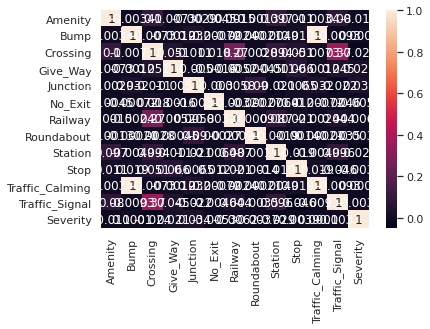

In [59]:
sns.heatmap(full_categorical_dataframe.corr(), annot=True) # annot is optional

Traffic Calming and Bump are highly correlated, I will be dropping the Traffic Calmimg column.

In [121]:
full_categorical_dataframe.drop(["Traffic_Calming"], axis=1,inplace=True)

In [60]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### **Check for correlation between all features with the suffix “twilight”. Include sunrise_sunset**

In [61]:
corr_btwn_Suffix = df[['Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight']]


In [62]:
# df['Nautical_Twilight'].corr(df['Civil_Twilight'])


In [63]:
corr_btwn_Suffix.corr().values

array([], shape=(0, 0), dtype=float64)

In [63]:
#Using the P VAlue

In [65]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['Sunrise_Sunset'],columns=df['Nautical_Twilight'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


### **Create a dataframe for boolean features**



In [66]:
bool_data= df.select_dtypes(include=["bool"]) # To get the columns with boolean values using dtypes
bool_data

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12657,False,False,False,False,False,False,False,False,False,False,False,False
12658,False,False,False,False,False,False,False,False,False,False,False,False
12659,False,False,False,False,False,False,False,False,False,False,False,False
12660,False,False,False,False,False,False,False,False,False,False,False,True


MORE INSIGHT DERIVED FROM THE DATA

In [67]:
bool_data.corr() #The correlation for the boolean datafraME

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Amenity,1.000000,-0.003412,0.101866,-0.007302,-0.002929,-0.004468,0.001527,-0.001289,0.097353,0.011230,-0.003412,0.079659
Bump,-0.003412,1.000000,-0.007316,-0.001184,0.032075,-0.000724,-0.002414,-0.000209,-0.004916,0.018859,1.000000,-0.009271
Crossing,0.101866,-0.007316,1.000000,0.050899,-0.010726,0.017569,0.269659,-0.002764,0.093505,0.051037,-0.007316,0.368723
Give_Way,-0.007302,-0.001184,0.050899,1.000000,-0.004965,-0.001550,-0.005166,-0.000447,-0.010521,0.065898,-0.001184,0.044702
Junction,-0.002929,0.032075,-0.010726,-0.004965,1.000000,-0.003038,0.005796,0.090102,-0.020616,0.006517,0.032075,-0.022295
No_Exit,-0.004468,-0.000724,0.017569,-0.001550,-0.003038,1.000000,-0.003161,-0.000274,-0.006437,0.012442,-0.000724,-0.004619
Railway,0.001527,-0.002414,0.269659,-0.005166,0.005796,-0.003161,1.000000,-0.000912,0.087263,0.020671,-0.002414,0.043863
Roundabout,-0.001289,-0.000209,-0.002764,-0.000447,0.090102,-0.000274,-0.000912,1.000000,-0.001858,-0.001361,-0.000209,-0.003503
Station,0.097353,-0.004916,0.093505,-0.010521,-0.020616,-0.006437,0.087263,-0.001858,1.000000,-0.018819,-0.004916,0.095609
Stop,0.011230,0.018859,0.051037,0.065898,0.006517,0.012442,0.020671,-0.001361,-0.018819,1.000000,0.018859,-0.046427


In [68]:
 bool_data['Amenity'].corr(df['Bump']) #REALTIONSHIP BETWEN TWO FEATURES

-0.003412006463360133

In [69]:
 bool_data['Traffic_Signal'].corr(df['Bump'])

-0.009271282315472763

Now let’s look at the bump feature. This feature indicates the presence of a speed bump  in a nearby location. 

In [70]:
Accident_by_Bump =df.value_counts(["Bump"]).reset_index(name= "Accident")
Accident_by_Bump

,Bump,Accident
0,False,12655
1,True,7


### **PIE CHART**

In [71]:
grouped = Accident_by_Bump.groupby("Bump")["Accident"].sum() 

In [73]:
grouped = pd.DataFrame(grouped)  #changing the series to dataframe

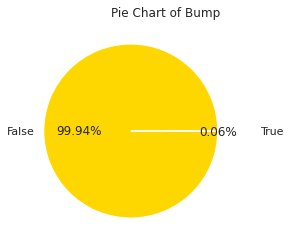

In [105]:
desired_cat = grouped.index.to_list()  #beacuse the grouped is an index type
accident_proportions = grouped["Accident"].to_list() #converting to list

plt.pie(accident_proportions, labels = desired_cat, radius = 1.0, colors = ["Gold", "silver"], autopct ="%0.2f%%", explode = [0.4,0])
plt.title("Pie Chart of Bump")

plt.show()



Here, we can see the accident is not caused by Bump. We see that 99.99% of the accidents were not due to a speed bump

Let's look at the Time Features to get the hours and days.

In [75]:
from datetime import datetime as dt
df.Start_Time = pd.to_datetime(df.Start_Time) #Converting  the starttime  colummn to a datetime


In [76]:
df.Start_Time

0       2019-04-08 07:55:21
1       2020-10-29 18:18:20
2       2020-12-25 01:43:00
3       2020-12-19 09:26:00
4       2020-11-11 21:08:15
                ...        
12657   2018-12-22 02:48:16
12658   2020-11-07 06:56:00
12659   2020-09-26 06:26:43
12660   2020-11-29 05:12:04
12661   2020-11-07 06:56:00
Name: Start_Time, Length: 12662, dtype: datetime64[ns]

In [77]:
 hours = df.Start_Time.dt.hour #to get hours from Start time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


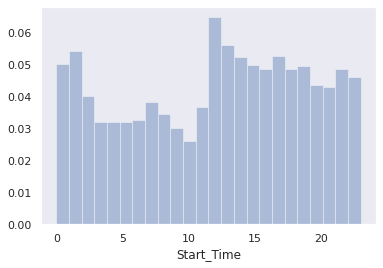

In [78]:
sns.distplot(hours, bins= 24, kde=False, norm_hist=True )

In [87]:
Day = df.Start_Time.dt.day_name()
Accident_by_day =df.value_counts([Day]).reset_index(name= "Accident")
Accident_by_day

,Start_Time,Accident
0,Thursday,2407
1,Wednesday,2304
2,Monday,1951
3,Friday,1811
4,Sunday,1511
5,Tuesday,1369
6,Saturday,1309


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

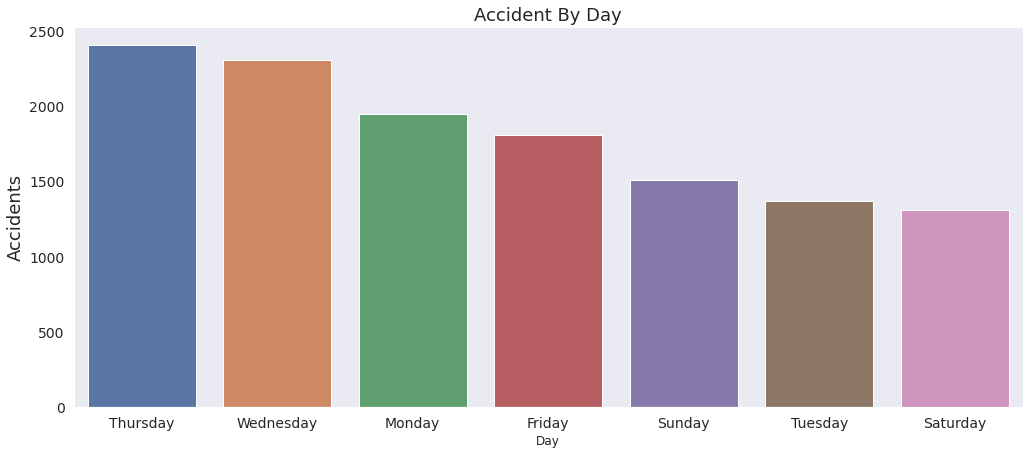

In [91]:

sns.set(style="dark")
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(data=Accident_by_day, x="Start_Time", y="Accident")
plt.xlabel('Day')
plt.ylabel('Accidents', size=18)
plt.title('Accident By Day', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
# sns.despine(left=True);

Between 2016 and 2020, there is a large number of accidents during weekdays (Monday to Thursday). On the contrary, there are relatively fewer accidents on weekends (Friday, Saturday, and Sunday)

In [94]:
year = df.Start_Time.dt.year
Accident_by_year =df.value_counts([year]).reset_index(name= "Accident")
Accident_by_year

,Start_Time,Accident
0,2020,8854
1,2019,2387
2,2018,684
3,2017,512
4,2016,225


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text major ticklabel objects>)

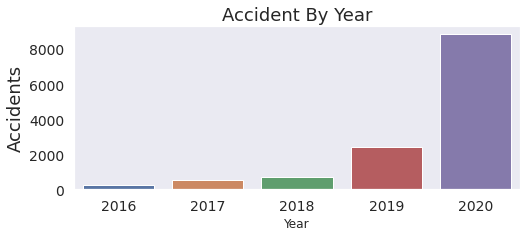

In [124]:
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(data=Accident_by_year, x="Start_Time", y="Accident")
plt.xlabel('Year')
plt.ylabel('Accidents', size=18)
plt.title('Accident By Year', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
# sns.despine(left=True);

Number of Accidents were lower and showed a more significant change in the early years as compared with those in recent years when the number of accidents has been raised high.

In [122]:
month = df.Start_Time.dt.month_name()
Accident_by_month =df.value_counts([month]).reset_index(name= "Accident")
Accident_by_month

,Start_Time,Accident
0,December,3536
1,November,2650
2,October,2196
3,February,1009
4,September,960
5,April,630
6,January,516
7,March,424
8,May,381
9,June,212


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

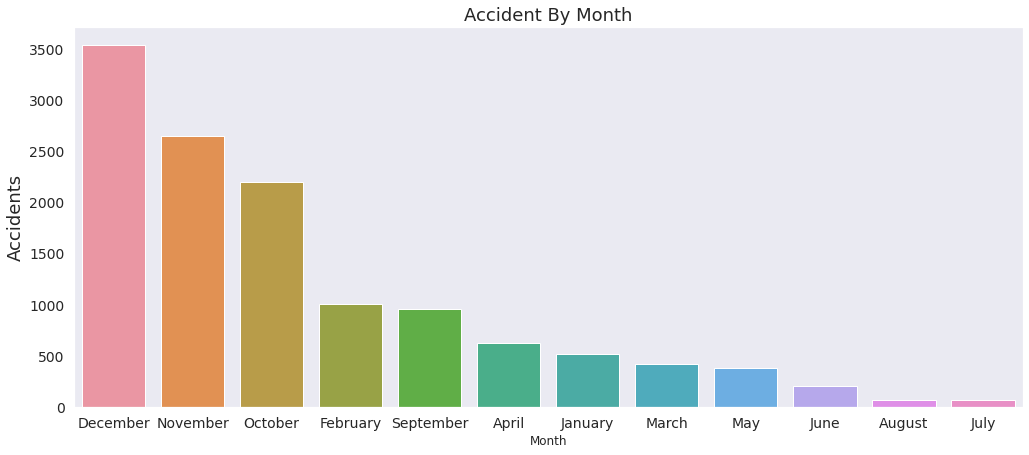

In [123]:

sns.set(style="dark")
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(data=Accident_by_month, x="Start_Time", y="Accident")
plt.xlabel('Month')
plt.ylabel('Accidents', size=18)
plt.title('Accident By Month', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
# sns.despine(left=True);

Monthly accidents increase steadily from  October-December. First half showing a smaller number of accidents compared to the second half of the year. 

In [98]:
Accident_by_Severity =df.value_counts(['Severity']).reset_index(name= "Accident")
Accident_by_Severity



,Severity,Accident
0,2,10578
1,4,1538
2,3,525
3,1,21


In [99]:

data = Accident_by_Severity.groupby("Severity")["Accident"].sum()

Text(0.5, 1.0, 'Accident by Severity')

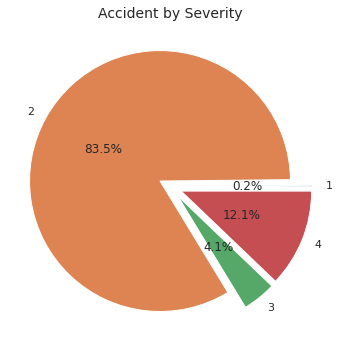

In [102]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.09]*4, labels=labels, pctdistance=0.5)
plt.title("Accident by Severity", fontsize=14)

# **Severity indicates the impact of the accident.**

There are hardly any accidents with very low severity(0 and 1).
Severity 3&4 having a high impact. Severity 2 accidents are more compare to severity 3&4. Severity 3&4 accidents mostly involve fatalities and severity 2, having injuries. 

## **Compare Number of Accident**

In [111]:
df[["Side"]]

,Side
0,R
1,L
2,L
3,L
4,L
...,...
12657,L
12658,L
12659,R
12660,R


In [108]:



Accident_by_Side =df.value_counts(['Side']).reset_index(name= "Accident")
Accident_by_Side


,Side,Accident
0,R,6919
1,L,5743


In [110]:

Compared = Accident_by_Side.groupby("Side")["Accident"].sum()
Compared

Side
L    5743
R    6919
Name: Accident, dtype: int64